In [2]:
import ast
import re
import math
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [7]:
CotLogs = "logs/mistral-7b-v0.1-samples25-fewshot0-temp0.7-topk40-CoT_logs.csv"
directLogs = "logs/mistral-7b-v0.1-samples25-fewshot0-temp0.7-topk40-direct_logs.csv"
cot_df = pd.read_csv(CotLogs)

# logs/mistral-7b-v0.1-samples3-fewshot0-temp0.7-topk40-direct_logs.csv
direct_df = pd.read_csv(directLogs)
# Interpret each column using ast.literal_eval
cot_df['reasoning_steps'] = cot_df['reasoning_steps'].apply(ast.literal_eval)
cot_df['answer_statements'] = cot_df['answer_statements'].apply(ast.literal_eval)
cot_df['all_neg_logp_ai_given_q'] = cot_df['all_neg_logp_ai_given_q'].apply(ast.literal_eval)
# cot_df['top_k'] = cot_df['top_k'].apply(ast.literal_eval)



direct_df['reasoning_steps'] = direct_df['reasoning_steps'].apply(ast.literal_eval)
direct_df['answer_statements'] = direct_df['answer_statements'].apply(ast.literal_eval)
direct_df['all_neg_logp_ai_given_q'] = direct_df['all_neg_logp_ai_given_q'].apply(ast.literal_eval)
# direct_df['top_k'] = direct_df['top_k'].apply(ast.literal_eval)


In [33]:
np.mean(cot_df['top_k'][0])

-1.723918855190277

In [9]:

# cot_df['top_k_entropy'] = -cot_df['top_k'].apply(np.mean)
# direct_df['top_k_entropy'] = -direct_df['top_k'].apply(np.mean)
direct_df

,question_number,reasoning_steps,answer_statements,all_neg_logp_ai_given_q,entropy,normalized_entropy,top_k
0,0,[<s> [INST] Q: Janet’s ducks lay 16 eggs per d...,[ Janet makes a total of $44 each day at the f...,"[21.71814727783203, 31.163801193237305, 28.516...",21.647705,1.070670,NaN
1,1,[<s> [INST] Q: A robe takes 2 bolts of blue fi...,[ It takes 2 1/2 bolts of fiber in total to ma...,"[32.91231918334961, 16.245086669921875, 16.442...",21.188713,0.822750,NaN
2,2,[<s> [INST] Q: Josh decides to try flipping a ...,"[ Josh made a profit of $20,000.</s>, Josh ma...","[11.95220947265625, 15.419988632202148, 18.313...",20.843403,0.884167,NaN
3,3,[<s> [INST] Q: James decides to run 3 sprints ...,[ James runs a total of 2160 meters (60 x 3 x ...,"[21.67789077758789, 23.8719482421875, 25.87926...",19.830870,0.887241,NaN
4,4,"[<s> [INST] Q: Every day, Wendi feeds each of ...",[ To determine the amount of feed Wendi needs ...,"[42.46503829956055, 13.668414115905762, 13.558...",22.775784,0.651951,NaN
...,...,...,...,...,...,...,...
645,645,[<s> [INST] Q: A bag of flour is divided into ...,[ The total amount of flour in three bags befo...,"[17.734487533569336, 37.81983947753906, 17.730...",21.182436,0.965809,"[-2.5716423988342285, -3.7255232334136963, -2...."
646,646,[<s> [INST] Q: Alisa biked 12 miles per hour f...,[ Alisa biked 12 miles per hour for 4.5 hours ...,"[24.664539337158203, 25.514699935913086, 17.49...",21.488775,0.508163,"[-3.839038610458374, -3.9390385150909424, -3.0..."
647,647,[<s> [INST] Q: Bill is trying to dig a well in...,"[ It will take Bill 14 hours to dig the well, ...","[37.14764404296875, 11.966161727905273, 21.652...",21.862476,1.002629,"[-3.0537774562835693, -2.1182639598846436, -3...."
648,648,[<s> [INST] Q: Howie wants to buy cupcakes for...,[ Howie should buy 56 cupcakes (2 vanilla and ...,"[23.0373592376709, 23.660850524902344, 25.9264...",25.516123,0.786749,"[-3.370934009552002, -3.2246198654174805, -3.0..."


In [52]:
direct_df

,question_number,reasoning_steps,answer_statements,all_neg_logp_ai_given_q,entropy,normalized_entropy,top_k,top_k_entropy
0,0,[<s> [INST] Q: Janet’s ducks lay 16 eggs per d...,[ Janet makes $108 per day at the farmers' mar...,"[16.0524959564209, 19.34689712524414, 12.52269...",22.119659,1.006320,"[-2.647629976272583, -2.7717196941375732, -2.1...",2.928247
1,1,[<s> [INST] Q: A robe takes 2 bolts of blue fi...,[ It takes 2.5 bolts of fiber in total to make...,"[16.240846633911133, 14.884185791015625, 20.63...",20.874220,0.875399,"[-2.581320285797119, -2.4841275215148926, -3.3...",2.985191
2,2,[<s> [INST] Q: Josh decides to try flipping a ...,"[ Josh made a profit of $50,000 after repairin...","[28.65304183959961, 15.261384010314941, 14.903...",23.104074,0.828333,"[-4.039386749267578, -2.534095525741577, -2.50...",3.106272
3,3,[<s> [INST] Q: James decides to run 3 sprints ...,[ James runs a total of 1080 meters per week.<...,"[12.374004364013672, 21.09069061279297, 12.374...",18.591568,0.909062,"[-2.226916551589966, -2.780510663986206, -2.22...",2.768940
4,4,"[<s> [INST] Q: Every day, Wendi feeds each of ...",[ Wendi needs to give her chickens a total of ...,"[33.19728469848633, 11.220330238342285, 30.515...",22.167381,0.652336,"[-3.44742751121521, -1.7826200723648071, -3.33...",2.765111
...,...,...,...,...,...,...,...,...
70,70,"[<s> [INST] Q: Judy teaches 5 dance classes, e...","[ Judy makes $2,250 in 1 week from teaching da...","[21.877918243408203, 22.986618041992188, 23.28...",23.598539,1.132966,"[-3.263878583908081, -3.3455810546875, -3.3749...",3.253795
71,71,[<s> [INST] Q: Kelian has two recipes for prep...,[ Kelian has to read a total of 60 instruction...,"[14.200239181518555, 12.293718338012695, 14.15...",13.202365,0.785405,"[-2.5214004516601562, -2.1468701362609863, -2....",2.275571
72,72,[<s> [INST] Q: Tommy is fundraising for his ch...,[ Tommy raises $132 by selling 43 brownies and...,"[15.077765464782715, 15.351346969604492, 15.07...",15.936498,0.702963,"[-2.4385507106781006, -2.5092544555664062, -2....",2.585732
73,73,[<s> [INST] Q: Shiela bought five cell phones ...,"[ Shiela will pay $75 per month for 3 months, ...","[22.894493103027344, 32.908180236816406, 24.09...",32.466232,1.088917,"[-3.3694450855255127, -3.649376630783081, -3.5...",3.777222


In [53]:
# q = 0
# token_path = f'tensors/mistral-7b-v0.1-samples25-fewshot0-temp0.7-topk40-CoT-gsm8k_p{q}.pt'
# log_prob_path = f'logprob_tensors/mistral-7b-v0.1-samples25-fewshot0-temp0.7-topk40-CoT-gsm8k_p{q}-logprobs.pt'
# tokens = torch.load(token_path)
# probs = torch.load(log_prob_path)
# print('Tokens :', tokens.shape)
# print('LogProbs: ', probs.shape)

In [54]:

# for idx, row in cot_df.iterrows():
#     q = row['question_number']
#     path = f'logprob_tensors/mistral-7b-v0.1-samples25-fewshot0-temp0.7-topk40-CoT-gsm8k_p{q}-logprobs.pt'
#     data = torch.load(path)
#     maxProbs = []
    

#     for row in data:
        



# # Print the loaded data
# print(data)



In [55]:
direct_df

,question_number,reasoning_steps,answer_statements,all_neg_logp_ai_given_q,entropy,normalized_entropy,top_k,top_k_entropy
0,0,[<s> [INST] Q: Janet’s ducks lay 16 eggs per d...,[ Janet makes $108 per day at the farmers' mar...,"[16.0524959564209, 19.34689712524414, 12.52269...",22.119659,1.006320,"[-2.647629976272583, -2.7717196941375732, -2.1...",2.928247
1,1,[<s> [INST] Q: A robe takes 2 bolts of blue fi...,[ It takes 2.5 bolts of fiber in total to make...,"[16.240846633911133, 14.884185791015625, 20.63...",20.874220,0.875399,"[-2.581320285797119, -2.4841275215148926, -3.3...",2.985191
2,2,[<s> [INST] Q: Josh decides to try flipping a ...,"[ Josh made a profit of $50,000 after repairin...","[28.65304183959961, 15.261384010314941, 14.903...",23.104074,0.828333,"[-4.039386749267578, -2.534095525741577, -2.50...",3.106272
3,3,[<s> [INST] Q: James decides to run 3 sprints ...,[ James runs a total of 1080 meters per week.<...,"[12.374004364013672, 21.09069061279297, 12.374...",18.591568,0.909062,"[-2.226916551589966, -2.780510663986206, -2.22...",2.768940
4,4,"[<s> [INST] Q: Every day, Wendi feeds each of ...",[ Wendi needs to give her chickens a total of ...,"[33.19728469848633, 11.220330238342285, 30.515...",22.167381,0.652336,"[-3.44742751121521, -1.7826200723648071, -3.33...",2.765111
...,...,...,...,...,...,...,...,...
70,70,"[<s> [INST] Q: Judy teaches 5 dance classes, e...","[ Judy makes $2,250 in 1 week from teaching da...","[21.877918243408203, 22.986618041992188, 23.28...",23.598539,1.132966,"[-3.263878583908081, -3.3455810546875, -3.3749...",3.253795
71,71,[<s> [INST] Q: Kelian has two recipes for prep...,[ Kelian has to read a total of 60 instruction...,"[14.200239181518555, 12.293718338012695, 14.15...",13.202365,0.785405,"[-2.5214004516601562, -2.1468701362609863, -2....",2.275571
72,72,[<s> [INST] Q: Tommy is fundraising for his ch...,[ Tommy raises $132 by selling 43 brownies and...,"[15.077765464782715, 15.351346969604492, 15.07...",15.936498,0.702963,"[-2.4385507106781006, -2.5092544555664062, -2....",2.585732
73,73,[<s> [INST] Q: Shiela bought five cell phones ...,"[ Shiela will pay $75 per month for 3 months, ...","[22.894493103027344, 32.908180236816406, 24.09...",32.466232,1.088917,"[-3.3694450855255127, -3.649376630783081, -3.5...",3.777222


In [10]:
currCotDF = cot_df
cotQuestions = currCotDF['question_number'].tolist()
print(cotQuestions)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233

In [11]:
direct_df

,question_number,reasoning_steps,answer_statements,all_neg_logp_ai_given_q,entropy,normalized_entropy,top_k
0,0,[<s> [INST] Q: Janet’s ducks lay 16 eggs per d...,[ Janet makes a total of $44 each day at the f...,"[21.71814727783203, 31.163801193237305, 28.516...",21.647705,1.070670,NaN
1,1,[<s> [INST] Q: A robe takes 2 bolts of blue fi...,[ It takes 2 1/2 bolts of fiber in total to ma...,"[32.91231918334961, 16.245086669921875, 16.442...",21.188713,0.822750,NaN
2,2,[<s> [INST] Q: Josh decides to try flipping a ...,"[ Josh made a profit of $20,000.</s>, Josh ma...","[11.95220947265625, 15.419988632202148, 18.313...",20.843403,0.884167,NaN
3,3,[<s> [INST] Q: James decides to run 3 sprints ...,[ James runs a total of 2160 meters (60 x 3 x ...,"[21.67789077758789, 23.8719482421875, 25.87926...",19.830870,0.887241,NaN
4,4,"[<s> [INST] Q: Every day, Wendi feeds each of ...",[ To determine the amount of feed Wendi needs ...,"[42.46503829956055, 13.668414115905762, 13.558...",22.775784,0.651951,NaN
...,...,...,...,...,...,...,...
645,645,[<s> [INST] Q: A bag of flour is divided into ...,[ The total amount of flour in three bags befo...,"[17.734487533569336, 37.81983947753906, 17.730...",21.182436,0.965809,"[-2.5716423988342285, -3.7255232334136963, -2...."
646,646,[<s> [INST] Q: Alisa biked 12 miles per hour f...,[ Alisa biked 12 miles per hour for 4.5 hours ...,"[24.664539337158203, 25.514699935913086, 17.49...",21.488775,0.508163,"[-3.839038610458374, -3.9390385150909424, -3.0..."
647,647,[<s> [INST] Q: Bill is trying to dig a well in...,"[ It will take Bill 14 hours to dig the well, ...","[37.14764404296875, 11.966161727905273, 21.652...",21.862476,1.002629,"[-3.0537774562835693, -2.1182639598846436, -3...."
648,648,[<s> [INST] Q: Howie wants to buy cupcakes for...,[ Howie should buy 56 cupcakes (2 vanilla and ...,"[23.0373592376709, 23.660850524902344, 25.9264...",25.516123,0.786749,"[-3.370934009552002, -3.2246198654174805, -3.0..."


In [12]:
currDirect_df = direct_df#.iloc[102:]
directIndices = []
for idx, row in currDirect_df.iterrows():
    if int(row['question_number']) in cotQuestions:
        # print(row['question_number'])

        directIndices.append(idx)
print(directIndices)
currDirectDF = direct_df.loc[directIndices]
currDirectDF

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233

,question_number,reasoning_steps,answer_statements,all_neg_logp_ai_given_q,entropy,normalized_entropy,top_k
0,0,[<s> [INST] Q: Janet’s ducks lay 16 eggs per d...,[ Janet makes a total of $44 each day at the f...,"[21.71814727783203, 31.163801193237305, 28.516...",21.647705,1.070670,NaN
1,1,[<s> [INST] Q: A robe takes 2 bolts of blue fi...,[ It takes 2 1/2 bolts of fiber in total to ma...,"[32.91231918334961, 16.245086669921875, 16.442...",21.188713,0.822750,NaN
2,2,[<s> [INST] Q: Josh decides to try flipping a ...,"[ Josh made a profit of $20,000.</s>, Josh ma...","[11.95220947265625, 15.419988632202148, 18.313...",20.843403,0.884167,NaN
3,3,[<s> [INST] Q: James decides to run 3 sprints ...,[ James runs a total of 2160 meters (60 x 3 x ...,"[21.67789077758789, 23.8719482421875, 25.87926...",19.830870,0.887241,NaN
4,4,"[<s> [INST] Q: Every day, Wendi feeds each of ...",[ To determine the amount of feed Wendi needs ...,"[42.46503829956055, 13.668414115905762, 13.558...",22.775784,0.651951,NaN
...,...,...,...,...,...,...,...
645,645,[<s> [INST] Q: A bag of flour is divided into ...,[ The total amount of flour in three bags befo...,"[17.734487533569336, 37.81983947753906, 17.730...",21.182436,0.965809,"[-2.5716423988342285, -3.7255232334136963, -2...."
646,646,[<s> [INST] Q: Alisa biked 12 miles per hour f...,[ Alisa biked 12 miles per hour for 4.5 hours ...,"[24.664539337158203, 25.514699935913086, 17.49...",21.488775,0.508163,"[-3.839038610458374, -3.9390385150909424, -3.0..."
647,647,[<s> [INST] Q: Bill is trying to dig a well in...,"[ It will take Bill 14 hours to dig the well, ...","[37.14764404296875, 11.966161727905273, 21.652...",21.862476,1.002629,"[-3.0537774562835693, -2.1182639598846436, -3...."
648,648,[<s> [INST] Q: Howie wants to buy cupcakes for...,[ Howie should buy 56 cupcakes (2 vanilla and ...,"[23.0373592376709, 23.660850524902344, 25.9264...",25.516123,0.786749,"[-3.370934009552002, -3.2246198654174805, -3.0..."


In [13]:
import numpy as np

sample = currDirectDF['all_neg_logp_ai_given_q'].iloc[0]
print('Samples: ', sample)
print('Mean: ', np.mean(sample))
print('SE: ', np.std(sample, ddof=1)/np.sqrt(len(sample)))

Samples:  [21.71814727783203, 31.163801193237305, 28.516845703125, 21.06340980529785, 23.570632934570312, 17.584287643432617, 22.511062622070312, 13.041524887084961, 12.52269172668457, 27.95907974243164, 12.52269172668457, 25.027864456176758, 26.247928619384766, 27.571504592895508, 29.5190372467041, 13.645036697387695, 13.041524887084961, 13.041524887084961, 20.176326751708984, 23.29072380065918, 38.885231018066406, 13.558873176574707, 13.041524887084961, 22.841957092285156, 29.129417419433594]
Mean:  21.647706031799316
SE:  1.4606962996955883


In [14]:
def calculate_se(samples):
    if len(samples) > 1:
        return np.std(samples, ddof=1) / np.sqrt(len(samples))
    else:
        return np.nan 

def calc_stats(df):
    df['mean'] = df['all_neg_logp_ai_given_q'].apply(np.mean)
    df['SE'] = df['all_neg_logp_ai_given_q'].apply(calculate_se)

    return df[['question_number', 'all_neg_logp_ai_given_q', 'mean', 'SE']]

direct_stats = calc_stats(currDirectDF)
cot_stats = calc_stats(currCotDF)
currCotDF

,question_number,reasoning_steps,answer_statements,all_neg_logp_ai_given_q,entropy,normalized_entropy,top_k,mean,SE
0,0,[<s> [INST] Q: Janet’s ducks lay 16 eggs per d...,"[So, Janet makes $18 every day at the farmers'...","[4.823678970336914, 5.049810409545898, 14.3193...",8.540055,0.636348,NaN,8.540055,1.475975
1,1,[<s> [INST] Q: A robe takes 2 bolts of blue fi...,"[So, it takes a total of 3 bolts of fiber to m...","[10.514573097229004, 14.61739730834961, 15.423...",10.584738,0.880695,NaN,10.584738,1.200217
2,2,[<s> [INST] Q: Josh decides to try flipping a ...,"[So, Josh made a profit of $68,500.</s>, So, J...","[7.414744853973389, 9.844337463378906, 5.92971...",7.104959,1.086542,NaN,7.104959,0.422815
3,3,[<s> [INST] Q: James decides to run 3 sprints ...,"[So, James runs a total of 540 meters during h...","[9.805235862731934, 8.201848983764648, 4.53203...",6.007361,0.442860,NaN,6.007362,0.492340
4,4,"[<s> [INST] Q: Every day, Wendi feeds each of ...","[Therefore, Wendi needs to give her chickens 8...","[8.404251098632812, 40.064205169677734, 8.9791...",17.891657,1.041536,NaN,17.891658,2.472979
...,...,...,...,...,...,...,...,...,...
652,687,[<s> [INST] Q: There is one set of twins and o...,[Final answer: One of the twins is 44 / 3 year...,"[18.262115478515625, 13.749940872192383, 5.143...",15.071144,1.437118,"[-5.887724876403809, -4.485498905181885, -3.03...",15.071143,1.582331
653,688,[<s> [INST] Q: John is very tired. He decides ...,"[Therefore, John has 100 minutes to nap.</s>, ...","[4.530750751495361, 6.895021438598633, 5.04017...",10.075221,1.277884,"[-1.8208484649658203, -3.5236103534698486, -2....",10.075221,1.329259
654,689,[<s> [INST] Q: Manolo bought five lollipops an...,"[So, 10 lollipops and 10 candies will cost Man...","[11.643835067749023, 8.634637832641602, 6.9825...",7.209369,0.659265,"[-3.8516674041748047, -3.6785333156585693, -3....",7.209369,0.420522
655,691,[<s> [INST] Q: John brings his dog to the vet....,"[So, John leaves with $<<125-64=61>>61.</s>, F...","[12.203840255737305, 11.377180099487305, 8.581...",13.722481,2.164958,"[-5.439331531524658, -3.7079548835754395, -4.4...",13.722481,1.150024


In [61]:
# cot_stats['all_neg_logp_ai_given_q'][59]
cot_stats

,question_number,all_neg_logp_ai_given_q,mean,SE
0,0,"[4.610836982727051, 4.943432331085205, 7.49393...",6.425316,1.424215
1,1,"[10.454978942871094, 6.696067810058594, 4.9254...",9.940182,1.776399
2,2,"[7.419735431671143, 5.111213207244873, 7.19155...",7.197204,0.606644
3,3,"[4.610363483428955, 10.499096870422363, 4.6103...",7.088569,1.130622
4,4,"[11.470559120178223, 10.093477249145508, 5.433...",17.158259,2.492357
...,...,...,...,...
66,69,"[3.4453649520874023, 3.4453649520874023, 3.445...",6.248132,1.250664
67,70,"[5.431783676147461, 5.876818656921387, 7.65446...",7.744931,0.871684
68,71,"[11.442866325378418, 18.499671936035156, 13.58...",14.608514,1.747421
69,72,"[7.4738922119140625, 12.836769104003906, 7.473...",7.781766,0.272036


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (657,) and arg 1 with shape (617,).

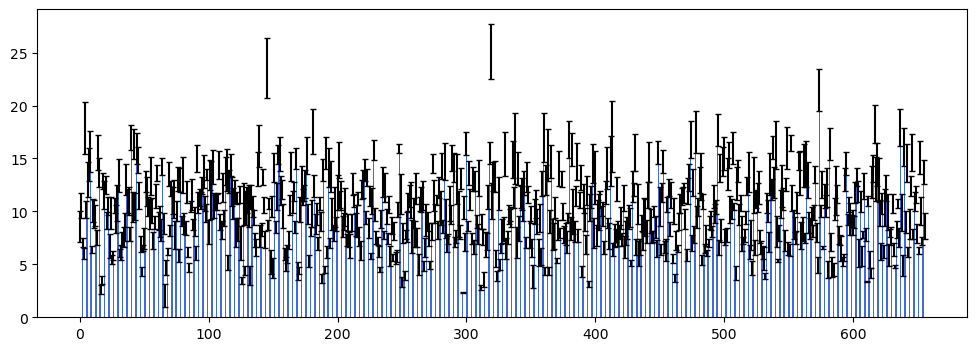

In [15]:
bar_width = 0.35
plt.figure(figsize=(12,4))

r1 = np.arange(len(cot_stats['mean']))
r2 = [x + bar_width for x in r1]

plt.bar(r1, cot_stats['mean'], color='royalblue', width=bar_width, yerr=cot_stats['SE'], capsize=2, label='CoT Prompting')
plt.bar(r2, direct_stats['mean'], color='crimson', width=bar_width, yerr=direct_stats['SE'], capsize=2, label='Direct Prompting')

plt.title('Entropy Analysis of Prompting Methods on GSM8K')
plt.xlabel('Question Number')
plt.ylabel('Entropy')
plt.xticks([r + bar_width / 2 for r in range(len(cot_stats['mean']))], cot_stats['question_number'])

plt.legend()
plt.show()


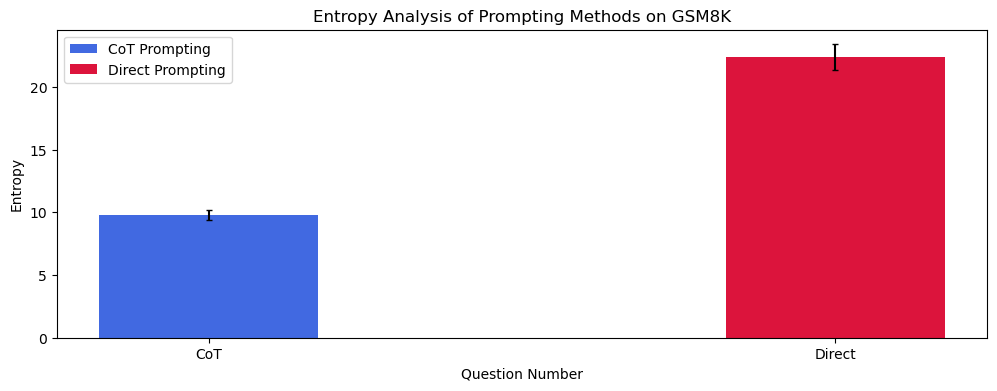

In [63]:
cot_means = cot_stats['mean'].tolist()
direct_means = direct_stats['mean'].tolist()

barCoTMeans = np.mean(cot_means)
barDirectMeans = np.mean(direct_means)

seCoT = (np.std(cot_means, ddof=1))/np.sqrt(len(cot_means))
seDirect = (np.std(direct_means, ddof=1))/np.sqrt(len(direct_means))

bar_width = 0.35
plt.figure(figsize=(12,4))

r1 = ['CoT']
r2 = ['Direct']

plt.bar(r1, barCoTMeans, color='royalblue', width=bar_width, yerr=seCoT, capsize=2, label='CoT Prompting')
plt.bar(r2, barDirectMeans, color='crimson', width=bar_width, yerr=seDirect, capsize=2, label='Direct Prompting')


plt.title('Entropy Analysis of Prompting Methods on GSM8K')
plt.xlabel('Question Number')
plt.ylabel('Entropy')
plt.xticks(r1 + r2)

plt.legend()
plt.show()


In [64]:
 np.array([cot_means + direct_means])

array([[ 6.42531631,  9.94018152,  7.19720376,  7.08856933, 17.15825942,
         9.58444769, 13.10605769, 12.32657621, 12.23585596,  6.16809177,
         8.19228952, 10.11882789, 13.11312804, 10.09550021,  6.73706729,
        16.6197232 , 13.27651792,  1.83865952,  4.89948683, 14.97782035,
        10.42953744, 13.00390711,  8.37925804,  9.13222948,  3.70668811,
         8.27986144,  6.85565202,  6.13493352, 11.61898317, 14.47452574,
         9.86455975, 12.4045938 ,  5.82439909,  5.67697296,  7.50527155,
         7.51608469,  5.67634537, 13.02019436, 10.49694371,  7.89010179,
        17.44981716,  9.87116117, 16.22823389,  9.24824741, 15.00465901,
        15.20627983,  8.17053881,  5.18505204,  5.60656075,  8.35580504,
        11.78175278, 13.47133167, 12.85063001,  9.043189  ,  6.67033436,
        12.76267533,  7.49383574,  6.24836395,  6.79477608, 12.32854888,
         9.79182847,  8.32737892,  9.41518471, 16.1047164 , 10.114047  ,
         4.31544569,  6.24813206,  7.74493148, 14.6

In [67]:
currCotDF['top_k_entropy'].tolist()

[1.723918855190277,
 2.0973042130470274,
 3.434472179412842,
 1.8090075850486755,
 4.8889338850975035,
 3.6663545846939085,
 3.776811254024506,
 3.4229416131973265,
 4.2672026515007015,
 2.8280981540679933,
 2.361031007766724,
 3.357611376047134,
 3.5643152236938476,
 3.7065099120140075,
 2.4577149569988253,
 4.739336967468262,
 3.763507831096649,
 0.3436290919780731,
 1.5163604974746705,
 4.106772148609162,
 3.627402436733246,
 3.386061578989029,
 2.2006712913513184,
 2.3561064541339873,
 1.9282782196998596,
 2.741052097082138,
 2.7849091470241545,
 2.010022670030594,
 3.2350701570510862,
 4.591814708709717,
 3.96875159740448,
 3.658485543727875,
 1.8706931173801422,
 1.9270902574062347,
 1.8354597091674805,
 2.3438641309738157,
 2.8014724791049956,
 4.23223248720169,
 3.6611882388591765,
 2.006101983785629,
 4.186685466766358,
 3.5971739649772645,
 5.092893636226654,
 3.716722559928894,
 4.999335658550263,
 4.316371107101441,
 1.7330042481422425,
 1.5432885229587554,
 3.7565299510955

In [68]:
currDirectDF['top_k_entropy'].tolist()

[2.9282466888427736,
 2.9851911306381225,
 3.1062724232673644,
 2.768940031528473,
 2.765111416578293,
 3.9495797157287598,
 3.235665911436081,
 4.18491678237915,
 2.9225629568099976,
 2.6648697018623353,
 3.4581113696098327,
 2.979201650619507,
 2.3808320999145507,
 1.9259659469127655,
 2.1614854395389558,
 3.6224071860313414,
 2.950993537902832,
 2.945664083957672,
 3.62480388879776,
 3.0911949634552003,
 3.6920257568359376,
 2.2839682698249817,
 2.041736489534378,
 1.6284030497074127,
 1.833081465959549,
 2.049281483888626,
 2.5270887553691863,
 3.059921050071716,
 1.6949039697647095,
 3.3090604066848757,
 4.173515331745148,
 3.6766052722930906,
 2.313367748260498,
 1.4236766755580903,
 1.9860677003860474,
 3.3324238896369933,
 3.0267988801002503,
 1.8625951647758483,
 2.392369341850281,
 1.5614649057388306,
 2.4354095458984375,
 3.1879483342170714,
 3.619509291648865,
 3.3729625582695006,
 2.642325985431671,
 3.732640290260315,
 3.6246423721313477,
 3.0037200927734373,
 3.130076277

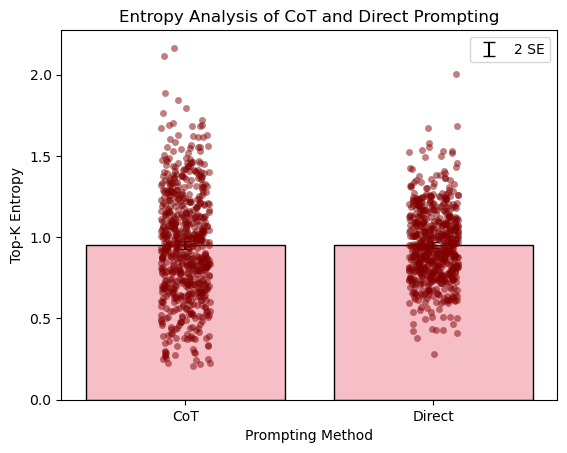

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

cot_means = currCotDF['normalized_entropy'].tolist()
direct_means = currDirectDF['normalized_entropy'].tolist()

barCoTMeans = np.mean(cot_means)
barDirectMeans = np.mean(direct_means)

seCoT = (np.std(cot_means, ddof=1))/np.sqrt(len(cot_means))
seDirect = (np.std(direct_means, ddof=1))/np.sqrt(len(direct_means))


# Sample data: Categories and values
data = pd.DataFrame({
    'Prompting Method': ['CoT', 'Direct'],
    'Entropy': [barCoTMeans, barDirectMeans],
    'SE': [2 * seCoT, 2 * seDirect]
})

# Generate some scatter data for these categories
# This is just for demonstration; you would replace this with your actual data points.
# np.random.seed(10)
np.random.seed(10)
scatter_data = pd.DataFrame({
    'Prompting Method': ['CoT']*len(cot_means) + ['Direct']*len(direct_means),
    'Entropy': cot_means + direct_means
})

# Create a bar plot
sns.barplot(x='Prompting Method', y='Entropy', capsize=5, data=data, color='lightpink', linewidth=1, edgecolor='black')
positions = [0, 1]  # Position of bars in barplot (0 for the first, 1 for the second)
err = data['SE'].to_numpy()
plt.errorbar(x=positions, y=data['Entropy'], yerr=err, fmt='none', capsize=4, color='black', label = '2 SE')

# Overlay scatter plot
sns.stripplot(x='Prompting Method', y='Entropy', data=scatter_data, jitter=True, color='maroon', alpha=0.5)
plt.ylabel('Top-K Entropy')
# Show the plot
plt.title('Entropy Analysis of CoT and Direct Prompting')

plt.show()


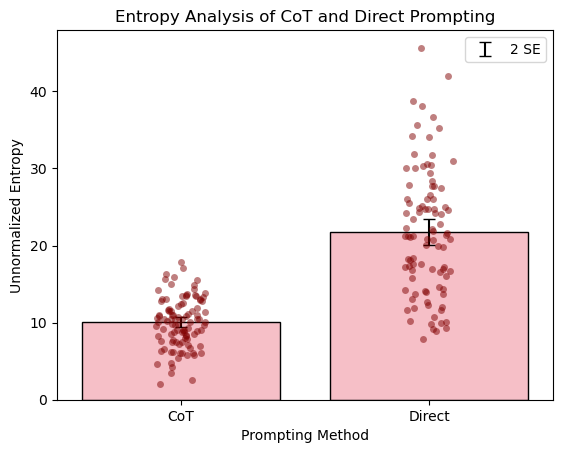

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

cot_means = currCotDF['entropy'].tolist()
direct_means = currDirectDF['entropy'].tolist()

barCoTMeans = np.mean(cot_means)
barDirectMeans = np.mean(direct_means)

seCoT = (np.std(cot_means, ddof=1))/np.sqrt(len(cot_means))
seDirect = (np.std(direct_means, ddof=1))/np.sqrt(len(direct_means))


# Sample data: Categories and values
data = pd.DataFrame({
    'Prompting Method': ['CoT', 'Direct'],
    'Entropy': [barCoTMeans, barDirectMeans],
    'SE': [2 * seCoT, 2 * seDirect]
})

# Generate some scatter data for these categories
# This is just for demonstration; you would replace this with your actual data points.
# np.random.seed(10)
np.random.seed(10)
scatter_data = pd.DataFrame({
    'Prompting Method': ['CoT']*len(cot_means) + ['Direct']*len(direct_means),
    'Entropy': cot_means + direct_means
})

# Create a bar plot
sns.barplot(x='Prompting Method', y='Entropy', capsize=5, data=data, color='lightpink', linewidth=1, edgecolor='black')
positions = [0, 1]  # Position of bars in barplot (0 for the first, 1 for the second)
err = data['SE'].to_numpy()
plt.errorbar(x=positions, y=data['Entropy'], yerr=err, fmt='none', capsize=4, color='black', label = '2 SE')

# Overlay scatter plot
sns.stripplot(x='Prompting Method', y='Entropy', data=scatter_data, jitter=True, color='maroon', alpha=0.5)
plt.ylabel('Unnormalized Entropy')
# Show the plot
plt.title('Entropy Analysis of CoT and Direct Prompting')

plt.show()


In [20]:
cot_means

[0.7130557298660278,
 0.8588230609893799,
 1.0934760570526123,
 0.4254114627838135,
 0.985342800617218,
 1.347606182098389,
 0.8723509907722473,
 1.1751110553741455,
 0.938510000705719,
 0.8901677131652832,
 0.7299164533615112,
 0.5215449929237366,
 0.8650569319725037,
 0.9701502919197084,
 0.3526409864425659,
 1.1708332300186155,
 0.5215449929237366,
 0.7259169816970825,
 0.8650569319725037,
 0.9701502919197084,
 0.83137047290802,
 0.3526409864425659,
 0.8788217306137085,
 1.1708332300186155,
 0.8269562721252441,
 0.7259169816970825,
 0.6195973753929138,
 0.83137047290802,
 1.1553133726119995,
 0.8788217306137085,
 1.3192076683044434,
 0.8269562721252441,
 0.7925310730934143]

In [32]:
t_stat, p_value = stats.ttest_rel(cot_means, direct_means) # Paired T-Test
# t_stat, p_value = stats.ttest_ind(cot_means, direct_means) # Unpaired T-Test

print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - suggest the means are significantly different")
else:
    print("Accept the null hypothesis - suggest the means are not significantly different")


ValueError: unequal length arrays

In [142]:
directAnswers, cotAnswers = currDirectDF['answer_statements'].to_list(), currCotDF['answer_statements'].to_list()


for direct, cot in zip(directAnswers, cotAnswers):
    print('Direct Samples: \n', direct[0], '\n', direct[1], '\n', direct[2])
    print()
    print('CoT Samples: \n', cot[0], '\n', cot[1], '\n', cot[2])
    print()
    print()

Direct Samples: 
  Janet makes a total of $44 each day at the farmers' market.</s> 
  Janet makes $108 per day at the farmers' market by selling the remaining 16 - 3 - 4 = 9 duck eggs.</s> 
  Janet makes $44 per day at the farmers' market by selling the remaining 12 duck eggs.</s>

CoT Samples: 
 So, Janet makes $18 every day at the farmers' market.</s> 
 Therefore, Janet makes $18 every day at the farmers' market.</s> 
 Final answer: Janet makes $18 every day at the farmers' market.</s>


Direct Samples: 
  It takes 2 1/2 bolts of fiber in total to make a robe, with 2 bolts of blue fiber and half that amount of white fiber.</s> 
  It takes 2.5 bolts of fiber in total to make a robe.</s> 
  It takes 2 bolts of blue fiber and 1 bolt of white fiber, making a total of 3 bolts.</s>

CoT Samples: 
 So, it takes a total of 3 bolts of fiber to make the robe.</s> 
 The answer is that it takes 3 bolts of fiber in total to make a robe.</s> 
 The final answer is that a robe takes 3 bolts of fiber

In [143]:
gsm8k[gsm8k['index'] == 49]

,index,question,answer,AnswerNum
49,49,Richard lives in an apartment building with 15...,The total number of units in the building will...,30.0


In [18]:
gsm8k = pd.read_csv('data/gsm8kTest.csv')
cot_merged = pd.merge(gsm8k, currCotDF, left_on='index', right_on='question_number', how='inner')
cot_merged = pd.merge(cot_merged, currDirectDF, left_on='index', right_on='question_number', how='inner')
cot_merged.rename(columns={"entropy_x": "CoT Entropy", "entropy_y": "Direct Entropy", 
                           'normalized_entropy_x': 'Normalized CoT Entropy', 'normalized_entropy_y': 'Normalized Direct Entropy',
                           'top_k_entropy_x': 'TopK CoT Entropy', 'top_k_entropy_y': 'TopK Direct Entropy'}, inplace=True)
cot_merged

,index,question,answer,AnswerNum,question_number_x,reasoning_steps_x,answer_statements_x,all_neg_logp_ai_given_q_x,CoT Entropy,Normalized CoT Entropy,...,SE_x,question_number_y,reasoning_steps_y,answer_statements_y,all_neg_logp_ai_given_q_y,Direct Entropy,Normalized Direct Entropy,top_k_y,mean_y,SE_y
0,0,Janet’s ducks lay 16 eggs per day. She eats th...,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18.0,0,[<s> [INST] Q: Janet’s ducks lay 16 eggs per d...,"[So, Janet makes $18 every day at the farmers'...","[4.823678970336914, 5.049810409545898, 14.3193...",8.540055,0.636348,...,1.475975,0,[<s> [INST] Q: Janet’s ducks lay 16 eggs per d...,[ Janet makes a total of $44 each day at the f...,"[21.71814727783203, 31.163801193237305, 28.516...",21.647705,1.070670,NaN,21.647706,1.460696
1,1,A robe takes 2 bolts of blue fiber and half th...,It takes 2/2=<<2/2=1>>1 bolt of white fiber\nS...,3.0,1,[<s> [INST] Q: A robe takes 2 bolts of blue fi...,"[So, it takes a total of 3 bolts of fiber to m...","[10.514573097229004, 14.61739730834961, 15.423...",10.584738,0.880695,...,1.200217,1,[<s> [INST] Q: A robe takes 2 bolts of blue fi...,[ It takes 2 1/2 bolts of fiber in total to ma...,"[32.91231918334961, 16.245086669921875, 16.442...",21.188713,0.822750,NaN,21.188713,1.225821
2,2,Josh decides to try flipping a house. He buys...,The cost of the house and repairs came out to ...,70000.0,2,[<s> [INST] Q: Josh decides to try flipping a ...,"[So, Josh made a profit of $68,500.</s>, So, J...","[7.414744853973389, 9.844337463378906, 5.92971...",7.104959,1.086542,...,0.422815,2,[<s> [INST] Q: Josh decides to try flipping a ...,"[ Josh made a profit of $20,000.</s>, Josh ma...","[11.95220947265625, 15.419988632202148, 18.313...",20.843403,0.884167,NaN,20.843405,1.728738
3,3,James decides to run 3 sprints 3 times a week....,He sprints 3*3=<<3*3=9>>9 times\nSo he runs 9*...,540.0,3,[<s> [INST] Q: James decides to run 3 sprints ...,"[So, James runs a total of 540 meters during h...","[9.805235862731934, 8.201848983764648, 4.53203...",6.007361,0.442860,...,0.492340,3,[<s> [INST] Q: James decides to run 3 sprints ...,[ James runs a total of 2160 meters (60 x 3 x ...,"[21.67789077758789, 23.8719482421875, 25.87926...",19.830870,0.887241,NaN,19.830869,1.090296
4,4,"Every day, Wendi feeds each of her chickens th...","If each chicken eats 3 cups of feed per day, t...",20.0,4,"[<s> [INST] Q: Every day, Wendi feeds each of ...","[Therefore, Wendi needs to give her chickens 8...","[8.404251098632812, 40.064205169677734, 8.9791...",17.891657,1.041536,...,2.472979,4,"[<s> [INST] Q: Every day, Wendi feeds each of ...",[ To determine the amount of feed Wendi needs ...,"[42.46503829956055, 13.668414115905762, 13.558...",22.775784,0.651951,NaN,22.775784,3.841879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,645,A bag of flour is divided into 8 portions of 2...,A bag of flour has 8 x 2 = <<8*2=16>>16 kilogr...,48.0,645,[<s> [INST] Q: A bag of flour is divided into ...,[Original bag = 3 portions * 2 kg/portion = 6 ...,"[11.074187278747559, 11.183769226074219, 9.035...",10.969996,0.713886,...,0.469180,645,[<s> [INST] Q: A bag of flour is divided into ...,[ The total amount of flour in three bags befo...,"[17.734487533569336, 37.81983947753906, 17.730...",21.182436,0.965809,"[-2.5716423988342285, -3.7255232334136963, -2....",21.182436,1.334300
613,646,Alisa biked 12 miles per hour for 4.5 hours. S...,Alisa = 12 * 4.5 = <<12*4.5=54>>54 miles\nStan...,79.0,646,[<s> [INST] Q: Alisa biked 12 miles per hour f...,[The final answer is Total distance = 79 miles...,"[13.160480499267578, 8.890764236450195, 3.2158...",5.456216,0.449130,...,0.767078,646,[<s> [INST] Q: Alisa biked 12 miles per hour f...,[ Alisa biked 12 miles per hour for 4.5 hours ...,"[24.664539337158203, 25.514699935913086, 17.49...",21.488775,0.508163,"[-3.839038610458374, -3.9390385150909424, -3.0...",21.488776,1.007031
614,647,Bill is trying to dig a well in his 

In [79]:
gsm8k

,index,question,answer,AnswerNum
0,0,Janet’s ducks lay 16 eggs per day. She eats th...,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18.0
1,1,A robe takes 2 bolts of blue fiber and half th...,It takes 2/2=<<2/2=1>>1 bolt of white fiber\nS...,3.0
2,2,Josh decides to try flipping a house. He buys...,The cost of the house and repairs came out to ...,70000.0
3,3,James decides to run 3 sprints 3 times a week....,He sprints 3*3=<<3*3=9>>9 times\nSo he runs 9*...,540.0
4,4,"Every day, Wendi feeds each of her chickens th...","If each chicken eats 3 cups of feed per day, t...",20.0
...,...,...,...,...
1314,1314,John had a son James when he was 19. James is...,Dora is 12-3=<<12-3=9>>9\nSo James is 9*2=<<9*...,8.0
1315,1315,There are some oranges in a basket. Ana spends...,There are 60 minutes in an hour. Ana peels an ...,5.0
1316,1316,Mark's car breaks down and he needs to get a n...,The discount on the radiator was 400*.8=$<<400...,230.0
1317,1317,"Farmer Brown has 20 animals on his farm, all e...",Let C be the number of chickens.\nThere are 20...,5.0


In [19]:
import re

def extractAnswers(sentences):
    last_numbers = []
    for sentence in sentences:
        # Improved regex to correctly capture numbers with commas
        numbers = re.findall(r'\b\d{1,3}(?:,\d{3})*\b', sentence)
        # Remove commas and convert to integers
        numbers = [int(num.replace(',', '')) for num in numbers]
        if numbers:
            return numbers

            
cot_merged['MistralAnswersCoT'] = None
cot_merged['MistralAnswersDirect'] = None

for idx, row in cot_merged.iterrows():
    answers = row['answer_statements_x']
    last_numbers = []
    for answer in answers:
        numbers = re.findall(r'\b\d{1,3}(?:,\d{3})*\b', answer)
        numbers = [int(num.replace(',', '')) for num in numbers]
        if numbers:
            last_numbers.append(numbers)
    cot_merged.at[idx, 'MistralAnswersCoT'] = last_numbers

for idx, row in cot_merged.iterrows():
    answers = row['answer_statements_y']
    last_numbers = []
    for answer in answers:
        numbers = re.findall(r'\b\d{1,3}(?:,\d{3})*\b', answer)
        numbers = [int(num.replace(',', '')) for num in numbers]
        if numbers:
            last_numbers.append(numbers)
    cot_merged.at[idx, 'MistralAnswersDirect'] = last_numbers


cot_merged

,index,question,answer,AnswerNum,question_number_x,reasoning_steps_x,answer_statements_x,all_neg_logp_ai_given_q_x,CoT Entropy,Normalized CoT Entropy,...,reasoning_steps_y,answer_statements_y,all_neg_logp_ai_given_q_y,Direct Entropy,Normalized Direct Entropy,top_k_y,mean_y,SE_y,MistralAnswersCoT,MistralAnswersDirect
0,0,Janet’s ducks lay 16 eggs per day. She eats th...,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18.0,0,[<s> [INST] Q: Janet’s ducks lay 16 eggs per d...,"[So, Janet makes $18 every day at the farmers'...","[4.823678970336914, 5.049810409545898, 14.3193...",8.540055,0.636348,...,[<s> [INST] Q: Janet’s ducks lay 16 eggs per d...,[ Janet makes a total of $44 each day at the f...,"[21.71814727783203, 31.163801193237305, 28.516...",21.647705,1.070670,NaN,21.647706,1.460696,"[[18], [18], [18], [18], [18], [9, 2, 9, 2, 18...","[[44], [108, 16, 3, 4, 9], [44, 12], [8], [40]..."
1,1,A robe takes 2 bolts of blue fiber and half th...,It takes 2/2=<<2/2=1>>1 bolt of white fiber\nS...,3.0,1,[<s> [INST] Q: A robe takes 2 bolts of blue fi...,"[So, it takes a total of 3 bolts of fiber to m...","[10.514573097229004, 14.61739730834961, 15.423...",10.584738,0.880695,...,[<s> [INST] Q: A robe takes 2 bolts of blue fi...,[ It takes 2 1/2 bolts of fiber in total to ma...,"[32.91231918334961, 16.245086669921875, 16.442...",21.188713,0.822750,NaN,21.188713,1.225821,"[[3], [3], [3], [3], [3], [3], [3], [3], [3], ...","[[2, 1, 2, 2], [2, 5], [2, 1, 3], [3, 2, 1], [..."
2,2,Josh decides to try flipping a house. He buys...,The cost of the house and repairs came out to ...,70000.0,2,[<s> [INST] Q: Josh decides to try flipping a ...,"[So, Josh made a profit of $68,500.</s>, So, J...","[7.414744853973389, 9.844337463378906, 5.92971...",7.104959,1.086542,...,[<s> [INST] Q: Josh decides to try flipping a ...,"[ Josh made a profit of $20,000.</s>, Josh ma...","[11.95220947265625, 15.419988632202148, 18.313...",20.843403,0.884167,NaN,20.843405,1.728738,"[[68500], [67500], [12000], [70000], [12000], ...","[[20000], [40000], [40000], [40000], [40000], ..."
3,3,James decides to run 3 sprints 3 times a week....,He sprints 3*3=<<3*3=9>>9 times\nSo he runs 9*...,540.0,3,[<s> [INST] Q: James decides to run 3 sprints ...,"[So, James runs a total of 540 meters during h...","[9.805235862731934, 8.201848983764648, 4.53203...",6.007361,0.442860,...,[<s> [INST] Q: James decides to run 3 sprints ...,[ James runs a total of 2160 meters (60 x 3 x ...,"[21.67789077758789, 23.8719482421875, 25.87926...",19.830870,0.887241,NaN,19.830869,1.090296,"[[540], [540], [540], [540], [540], [540], [54...","[[60, 3, 3], [360, 3, 3, 60], [60, 3, 3, 1], [..."
4,4,"Every day, Wendi feeds each of her chickens th...","If each chicken eats 3 cups of feed per day, t...",20.0,4,"[<s> [INST] Q: Every day, Wendi feeds each of ...","[Therefore, Wendi needs to give her chickens 8...","[8.404251098632812, 40.064205169677734, 8.9791...",17.891657,1.041536,...,"[<s> [INST] Q: Every day, Wendi feeds each of ...",[ To determine the amount of feed Wendi needs ...,"[42.46503829956055, 13.668414115905762, 13.558...",22.775784,0.651951,NaN,22.775784,3.841879,"[[860], [5, 20, 5, 20, 5, 100, 100], [20], [3]...","[[45], [50], [20], [10, 40], [20], [20], [20],..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,645,A bag of flour is divided into 8 portions of 2...,A bag of flour has 8 x 2 = <<8*2=16>>16 kilogr...,48.0,645,[<s> [INST] Q: A bag of flour is divided into ...,[Original bag = 3 portions * 2 kg/portion = 6 ...,"[11.074187278747559, 11.183769226074219, 9.035...",10.969996,0.713886,...,[<s> [INST] Q: A bag of flour is divided into ...,[ The total amount of flour in three bags befo...,"[17.734487533569336, 37.81983947753906, 17.730...",21.182436,0.965809,"[-2.5716423988342285, -3.7255232334136963, -2....",21.182436,1.334300,"[[3, 2, 6], [24], [48], [16], [48], [48], [48]...","[[48], [24, 8, 2, 3], [24], [24], [48], [24], ..."
613,646,Alisa bike

In [81]:
cot_merged.iloc[2]['answer']

'The cost of the house and repairs came out to 80,000+50,000=$<<80000+50000=130000>>130,000\nHe increased the value of the house by 80,000*1.5=<<80000*1.5=120000>>120,000\nSo the new value of the house is 120,000+80,000=$<<120000+80000=200000>>200,000\nSo he made a profit of 200,000-130,000=$<<200000-130000=70000>>70,000\n#### 70000'

In [20]:
cot_merged['AnswerNum'] = cot_merged['AnswerNum'].astype(int)
# cot_merged['MistralAnswersDirect'] = cot_merged['MistralAnswersDirect'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [21]:
cot_merged['MistralAccCoT'] = None
cot_merged['MistralAccDirect'] = None

for idx, row in cot_merged.iterrows():
    cot_nums = 0
    cot_total = 25
    cot_answers = row['MistralAnswersCoT']
    direct_answers = row['MistralAnswersDirect']

    groundTruth = row['AnswerNum']
    for ans in cot_answers:
        if groundTruth in ans:
            cot_nums += 1
        elif ans == None:
            cot_total -= 1
    direct_nums = 0
    direct_total = 25
    for ans in direct_answers:
        if groundTruth in ans:
            # print(ans, groundTruth, total)
            direct_nums += 1
        elif ans == None:
            direct_total -= 1
        
    cot_merged.at[idx, 'MistralAccCoT'] = cot_nums/cot_total
    cot_merged.at[idx, 'MistralAccDirect'] = direct_nums/direct_total

cot_merged
            

,index,question,answer,AnswerNum,question_number_x,reasoning_steps_x,answer_statements_x,all_neg_logp_ai_given_q_x,CoT Entropy,Normalized CoT Entropy,...,all_neg_logp_ai_given_q_y,Direct Entropy,Normalized Direct Entropy,top_k_y,mean_y,SE_y,MistralAnswersCoT,MistralAnswersDirect,MistralAccCoT,MistralAccDirect
0,0,Janet’s ducks lay 16 eggs per day. She eats th...,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18.0,0,[<s> [INST] Q: Janet’s ducks lay 16 eggs per d...,"[So, Janet makes $18 every day at the farmers'...","[4.823678970336914, 5.049810409545898, 14.3193...",8.540055,0.636348,...,"[21.71814727783203, 31.163801193237305, 28.516...",21.647705,1.070670,NaN,21.647706,1.460696,"[[18], [18], [18], [18], [18], [9, 2, 9, 2, 18...","[[44], [108, 16, 3, 4, 9], [44, 12], [8], [40]...",1.0,0.0
1,1,A robe takes 2 bolts of blue fiber and half th...,It takes 2/2=<<2/2=1>>1 bolt of white fiber\nS...,3.0,1,[<s> [INST] Q: A robe takes 2 bolts of blue fi...,"[So, it takes a total of 3 bolts of fiber to m...","[10.514573097229004, 14.61739730834961, 15.423...",10.584738,0.880695,...,"[32.91231918334961, 16.245086669921875, 16.442...",21.188713,0.822750,NaN,21.188713,1.225821,"[[3], [3], [3], [3], [3], [3], [3], [3], [3], ...","[[2, 1, 2, 2], [2, 5], [2, 1, 3], [3, 2, 1], [...",0.8,0.24
2,2,Josh decides to try flipping a house. He buys...,The cost of the house and repairs came out to ...,70000.0,2,[<s> [INST] Q: Josh decides to try flipping a ...,"[So, Josh made a profit of $68,500.</s>, So, J...","[7.414744853973389, 9.844337463378906, 5.92971...",7.104959,1.086542,...,"[11.95220947265625, 15.419988632202148, 18.313...",20.843403,0.884167,NaN,20.843405,1.728738,"[[68500], [67500], [12000], [70000], [12000], ...","[[20000], [40000], [40000], [40000], [40000], ...",0.12,0.08
3,3,James decides to run 3 sprints 3 times a week....,He sprints 3*3=<<3*3=9>>9 times\nSo he runs 9*...,540.0,3,[<s> [INST] Q: James decides to run 3 sprints ...,"[So, James runs a total of 540 meters during h...","[9.805235862731934, 8.201848983764648, 4.53203...",6.007361,0.442860,...,"[21.67789077758789, 23.8719482421875, 25.87926...",19.830870,0.887241,NaN,19.830869,1.090296,"[[540], [540], [540], [540], [540], [540], [54...","[[60, 3, 3], [360, 3, 3, 60], [60, 3, 3, 1], [...",0.96,0.04
4,4,"Every day, Wendi feeds each of her chickens th...","If each chicken eats 3 cups of feed per day, t...",20.0,4,"[<s> [INST] Q: Every day, Wendi feeds each of ...","[Therefore, Wendi needs to give her chickens 8...","[8.404251098632812, 40.064205169677734, 8.9791...",17.891657,1.041536,...,"[42.46503829956055, 13.668414115905762, 13.558...",22.775784,0.651951,NaN,22.775784,3.841879,"[[860], [5, 20, 5, 20, 5, 100, 100], [20], [3]...","[[45], [50], [20], [10, 40], [20], [20], [20],...",0.44,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,645,A bag of flour is divided into 8 portions of 2...,A bag of flour has 8 x 2 = <<8*2=16>>16 kilogr...,48.0,645,[<s> [INST] Q: A bag of flour is divided into ...,[Original bag = 3 portions * 2 kg/portion = 6 ...,"[11.074187278747559, 11.183769226074219, 9.035...",10.969996,0.713886,...,"[17.734487533569336, 37.81983947753906, 17.730...",21.182436,0.965809,"[-2.5716423988342285, -3.7255232334136963, -2....",21.182436,1.334300,"[[3, 2, 6], [24], [48], [16], [48], [48], [48]...","[[48], [24, 8, 2, 3], [24], [24], [48], [24], ...",0.72,0.52
613,646,Alisa biked 12 miles per hour for 4.5 hours. S...,Alisa = 12 * 4.5 = <<12*4.5=54>>54 miles\nStan...,79.0,646,[<s> [INST] Q: Alisa biked 12 miles per hour f...,[The final answer is Total distance = 79 miles...,"[13.160480499267578, 8.890764236450195, 3.2158...",5.456216,0.449130,...,"[24.664539337158203, 25.514699935913086, 17.49...",21.488775,0.508163,"[-3.839038610458374, -3.9390385150909424, -3.0...",21.488776,1.007031,"[[79], [54, 25, 54, 25, 79, 79], [79], [79], [...","[[12, 4, 5, 10, 2, 5, 54], [12, 4, 5, 10, 2, 5...",1.0,0.44
614,647,Bill is trying to

In [24]:
cot_merged['AccDelta'] = cot_merged['MistralAccCoT'] - cot_merged['MistralAccDirect']
cot_merged

,index,question,answer,AnswerNum,question_number_x,reasoning_steps_x,answer_statements_x,all_neg_logp_ai_given_q_x,CoT Entropy,Normalized CoT Entropy,...,Direct Entropy,Normalized Direct Entropy,top_k_y,mean_y,SE_y,MistralAnswersCoT,MistralAnswersDirect,MistralAccCoT,MistralAccDirect,AccDelta
0,0,Janet’s ducks lay 16 eggs per day. She eats th...,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18.0,0,[<s> [INST] Q: Janet’s ducks lay 16 eggs per d...,"[So, Janet makes $18 every day at the farmers'...","[4.823678970336914, 5.049810409545898, 14.3193...",8.540055,0.636348,...,21.647705,1.070670,NaN,21.647706,1.460696,"[[18], [18], [18], [18], [18], [9, 2, 9, 2, 18...","[[44], [108, 16, 3, 4, 9], [44, 12], [8], [40]...",1.0,0.0,1.0
1,1,A robe takes 2 bolts of blue fiber and half th...,It takes 2/2=<<2/2=1>>1 bolt of white fiber\nS...,3.0,1,[<s> [INST] Q: A robe takes 2 bolts of blue fi...,"[So, it takes a total of 3 bolts of fiber to m...","[10.514573097229004, 14.61739730834961, 15.423...",10.584738,0.880695,...,21.188713,0.822750,NaN,21.188713,1.225821,"[[3], [3], [3], [3], [3], [3], [3], [3], [3], ...","[[2, 1, 2, 2], [2, 5], [2, 1, 3], [3, 2, 1], [...",0.8,0.24,0.56
2,2,Josh decides to try flipping a house. He buys...,The cost of the house and repairs came out to ...,70000.0,2,[<s> [INST] Q: Josh decides to try flipping a ...,"[So, Josh made a profit of $68,500.</s>, So, J...","[7.414744853973389, 9.844337463378906, 5.92971...",7.104959,1.086542,...,20.843403,0.884167,NaN,20.843405,1.728738,"[[68500], [67500], [12000], [70000], [12000], ...","[[20000], [40000], [40000], [40000], [40000], ...",0.12,0.08,0.04
3,3,James decides to run 3 sprints 3 times a week....,He sprints 3*3=<<3*3=9>>9 times\nSo he runs 9*...,540.0,3,[<s> [INST] Q: James decides to run 3 sprints ...,"[So, James runs a total of 540 meters during h...","[9.805235862731934, 8.201848983764648, 4.53203...",6.007361,0.442860,...,19.830870,0.887241,NaN,19.830869,1.090296,"[[540], [540], [540], [540], [540], [540], [54...","[[60, 3, 3], [360, 3, 3, 60], [60, 3, 3, 1], [...",0.96,0.04,0.92
4,4,"Every day, Wendi feeds each of her chickens th...","If each chicken eats 3 cups of feed per day, t...",20.0,4,"[<s> [INST] Q: Every day, Wendi feeds each of ...","[Therefore, Wendi needs to give her chickens 8...","[8.404251098632812, 40.064205169677734, 8.9791...",17.891657,1.041536,...,22.775784,0.651951,NaN,22.775784,3.841879,"[[860], [5, 20, 5, 20, 5, 100, 100], [20], [3]...","[[45], [50], [20], [10, 40], [20], [20], [20],...",0.44,0.52,-0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,645,A bag of flour is divided into 8 portions of 2...,A bag of flour has 8 x 2 = <<8*2=16>>16 kilogr...,48.0,645,[<s> [INST] Q: A bag of flour is divided into ...,[Original bag = 3 portions * 2 kg/portion = 6 ...,"[11.074187278747559, 11.183769226074219, 9.035...",10.969996,0.713886,...,21.182436,0.965809,"[-2.5716423988342285, -3.7255232334136963, -2....",21.182436,1.334300,"[[3, 2, 6], [24], [48], [16], [48], [48], [48]...","[[48], [24, 8, 2, 3], [24], [24], [48], [24], ...",0.72,0.52,0.2
613,646,Alisa biked 12 miles per hour for 4.5 hours. S...,Alisa = 12 * 4.5 = <<12*4.5=54>>54 miles\nStan...,79.0,646,[<s> [INST] Q: Alisa biked 12 miles per hour f...,[The final answer is Total distance = 79 miles...,"[13.160480499267578, 8.890764236450195, 3.2158...",5.456216,0.449130,...,21.488775,0.508163,"[-3.839038610458374, -3.9390385150909424, -3.0...",21.488776,1.007031,"[[79], [54, 25, 54, 25, 79, 79], [79], [79], [...","[[12, 4, 5, 10, 2, 5, 54], [12, 4, 5, 10, 2, 5...",1.0,0.44,0.56
614,647,Bill is trying to dig a well in his backyard. ...,First find how fast Bill can dig through clay:...,10.0,647,[<s> [INST] Q: Bill is trying to dig a well in...,[It will take Bill 10 hours to dig the well.</...,"[4.467230319976807, 3.4093616008758545, 3.4093...",4.184755,0.378931,...,21.862476,1.002629,"[-3.0537774562835693, -2.1182639598846436, -3....",21.862475,

In [25]:
x1 = pd.to_numeric(cot_merged['Direct Entropy'])
x2 = pd.to_numeric(cot_merged['MistralAccDirect'])
y = pd.to_numeric(cot_merged['AccDelta'])

# Create a DataFrame for Seaborn
cot_lm = pd.DataFrame({
    'Direct Entropy': x1,
    'Direct Accuracy': x2,
    'AccuracyDelta': y
})

X = sm.add_constant(cot_lm[['Direct Entropy', 'Direct Accuracy']])
lm = sm.OLS(y, X).fit()
intercept, beta_1, beta_2 = lm.params

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AccDelta   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     55.04
Date:                Mon, 13 May 2024   Prob (F-statistic):           1.03e-22
Time:                        18:19:04   Log-Likelihood:                -210.07
No. Observations:                 617   AIC:                             426.1
Df Residuals:                     614   BIC:                             439.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5569      0.040     13.880      0.000       0.478       0.636
Direct Entropy     -0.0058      0.002     -3.337      0.001      -0.009      -0.002
Direct Accuracy    -0.6077      0.060    -10.068      0.000      -0.726      -0.489
==============================================================================
Omnibus:                     1195.661   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.276
Skew:                           0.110   Prob(JB):                     1.47e-10
Kurtosis:                       1.691   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
cot_lm.corr()

,Direct Entropy,Direct Accuracy,AccuracyDelta
Direct Entropy,1.000000,-0.133366,0.037087
Direct Accuracy,-0.133366,1.000000,-0.532081
AccuracyDelta,0.037087,-0.532081,1.000000


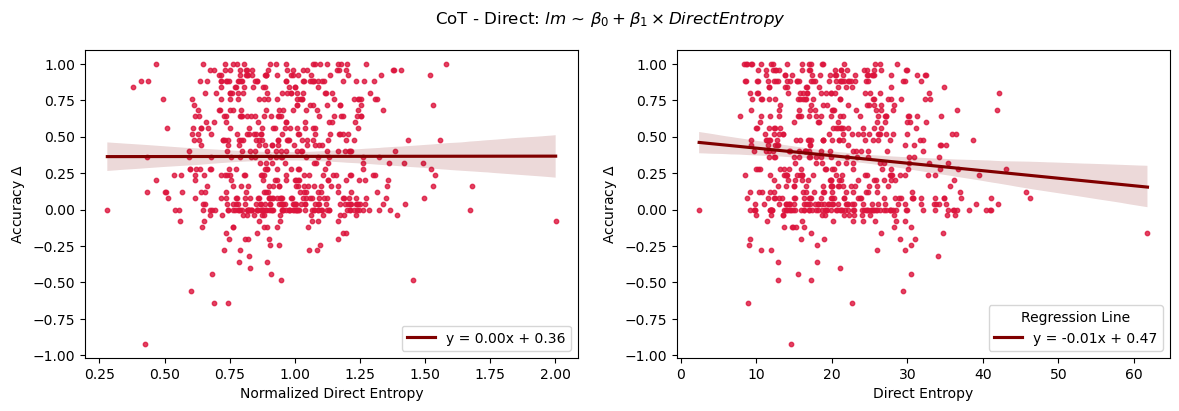

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AccDelta   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     7.486
Date:                Mon, 13 May 2024   Prob (F-statistic):            0.00640
Time:                        18:19:41   Log-Likelihood:                -257.21
No. Observations:                 617   AIC:                             518.4
Df Residuals:                     615   BIC:                             527.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4728      0.042     11.172      0.000       0.390       0.556
Direct Entropy    -0.0052      0.002     -2.736      0.006      -0.009      -0.001
==============================================================================
Omnibus:                       36.420   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.008
Skew:                           0.010   Prob(JB):                     0.000908
Kurtosis:                       2.262   Cond. No.                         64.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
x1 = pd.to_numeric(cot_merged['Normalized Direct Entropy'])
x2 = pd.to_numeric(cot_merged['Direct Entropy'])
y = pd.to_numeric(cot_merged['AccDelta'])

# Create a DataFrame for Seaborn
cot_lm_normalized = pd.DataFrame({
    'Normalized Entropy': x1,
    'Accuracy Delta': y
})
cot_lm_unnormalized = pd.DataFrame({
    'Entropy': x2,
    'Accuracy Delta': y

})



fig, axs = plt.subplots(1, 2, figsize=(14, 4))
X = sm.add_constant(x1)
lm = sm.OLS(y, X).fit()
intercept, slope = lm.params
sns.regplot(ax=axs[0], x='Normalized Entropy', y='Accuracy Delta', data=cot_lm_normalized, ci=95,
                 scatter_kws={"color": "crimson", "s": 10},  # scatter_kws for scatter points
                 line_kws={"color": "maroon", "label": f'y = {slope:.2f}x + {intercept:.2f}'})  # line_kws for line
axs[0].legend()
axs[0].set_xlabel('Normalized Direct Entropy')
axs[0].set_ylabel(r'Accuracy $\Delta$')


X = sm.add_constant(x2)
lm = sm.OLS(y, X).fit()
intercept, slope = lm.params
sns.regplot(ax=axs[1], x='Entropy', y='Accuracy Delta', data=cot_lm_unnormalized, ci=95,
                 scatter_kws={"color": "crimson", "s": 10},  # scatter_kws for scatter points
                 line_kws={"color": "maroon", "label": f'y = {slope:.2f}x + {intercept:.2f}'})  # line_kws for line

axs[1].legend()
axs[1].set_xlabel('Direct Entropy')
axs[1].set_ylabel(r'Accuracy $\Delta$')

fig.suptitle(r'CoT - Direct: $lm$ ~ $\beta_0 + \beta_1 \times DirectEntropy$')
plt.legend(title='Regression Line')

plt.show()
lm.summary()

In [154]:
entropy = pd.DataFrame({
    'Direct Entropy': cot_merged['Direct Entropy'],
    'CoT Entropy': cot_merged['CoT Entropy']
})
entropy.corr()

,Direct Entropy,CoT Entropy
Direct Entropy,1.000000,0.234702
CoT Entropy,0.234702,1.000000


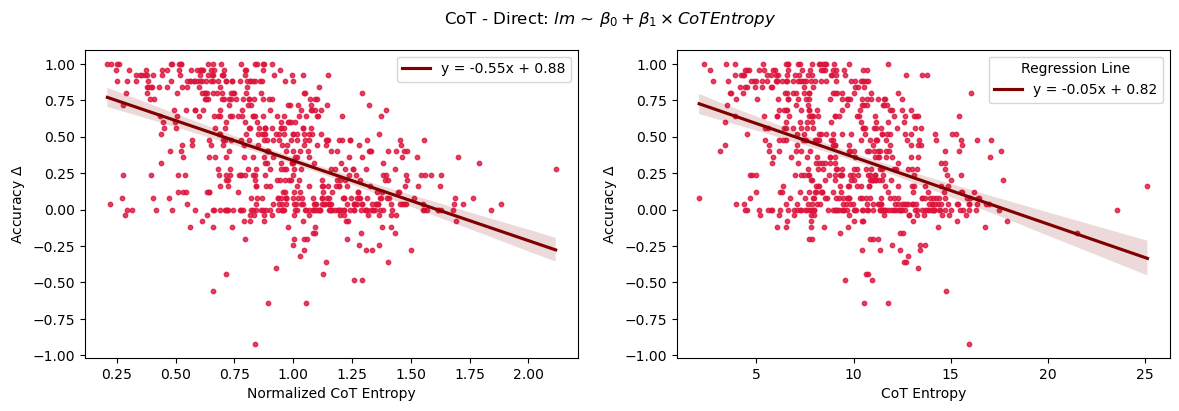

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AccDelta   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     126.4
Date:                Mon, 13 May 2024   Prob (F-statistic):           8.54e-27
Time:                        18:19:57   Log-Likelihood:                -203.29
No. Observations:                 617   AIC:                             410.6
Df Residuals:                     615   BIC:                             419.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8201      0.043     19.183      0.000       0.736       0.904
CoT Entropy    -0.0460      0.004    -11.241      0.000      -0.054      -0.038
==============================================================================
Omnibus:                       28.147   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.222
Skew:                          -0.127   Prob(JB):                      0.00135
Kurtosis:                       2.329   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
x1 = pd.to_numeric(cot_merged['Normalized CoT Entropy'])
x2 = pd.to_numeric(cot_merged['CoT Entropy'])
y = pd.to_numeric(cot_merged['AccDelta'])

# Create a DataFrame for Seaborn
cot_lm_normalized = pd.DataFrame({
    'Normalized Entropy': x1,
    'Accuracy Delta': y
})
cot_lm_unnormalized = pd.DataFrame({
    'Entropy': x2,
    'Accuracy Delta': y

})



fig, axs = plt.subplots(1, 2, figsize=(14, 4))
X = sm.add_constant(x1)
lm = sm.OLS(y, X).fit()
intercept, slope = lm.params
sns.regplot(ax=axs[0], x='Normalized Entropy', y='Accuracy Delta', data=cot_lm_normalized, ci=95,
                 scatter_kws={"color": "crimson", "s": 10},  # scatter_kws for scatter points
                 line_kws={"color": "maroon", "label": f'y = {slope:.2f}x + {intercept:.2f}'})  # line_kws for line
axs[0].legend()
axs[0].set_xlabel('Normalized CoT Entropy')
axs[0].set_ylabel(r'Accuracy $\Delta$')


X = sm.add_constant(x2)
lm = sm.OLS(y, X).fit()
intercept, slope = lm.params
sns.regplot(ax=axs[1], x='Entropy', y='Accuracy Delta', data=cot_lm_unnormalized, ci=95,
                 scatter_kws={"color": "crimson", "s": 10},  # scatter_kws for scatter points
                 line_kws={"color": "maroon", "label": f'y = {slope:.2f}x + {intercept:.2f}'})  # line_kws for line

axs[1].legend()
axs[1].set_xlabel('CoT Entropy')
axs[1].set_ylabel(r'Accuracy $\Delta$')

fig.suptitle(r'CoT - Direct: $lm$ ~ $\beta_0 + \beta_1 \times CoTEntropy$')
plt.legend(title='Regression Line')

plt.show()
lm.summary()

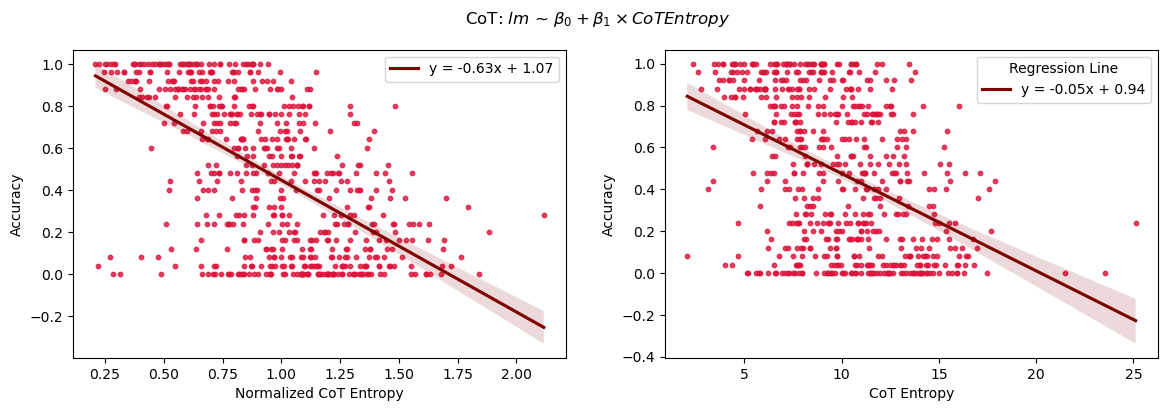

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MistralAccCoT   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     142.9
Date:                Mon, 13 May 2024   Prob (F-statistic):           9.32e-30
Time:                        18:20:37   Log-Likelihood:                -172.16
No. Observations:                 617   AIC:                             348.3
Df Residuals:                     615   BIC:                             357.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9399      0.041     23.123      0.000       0.860       1.020
CoT Entropy    -0.0465      0.004    -11.953      0.000      -0.054      -0.039
==============================================================================
Omnibus:                      119.462   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.266
Skew:                          -0.151   Prob(JB):                     1.20e-06
Kurtosis:                       2.015   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
x1 = pd.to_numeric(cot_merged['Normalized CoT Entropy'])
x2 = pd.to_numeric(cot_merged['CoT Entropy'])
y = pd.to_numeric(cot_merged['MistralAccCoT'])

# Create a DataFrame for Seaborn
cot_lm_normalized = pd.DataFrame({
    'Normalized Entropy': x1,
    'Accuracy Delta': y
})
cot_lm_unnormalized = pd.DataFrame({
    'Entropy': x2,
    'Accuracy Delta': y

})



fig, axs = plt.subplots(1, 2, figsize=(14, 4))
X = sm.add_constant(x1)
lm = sm.OLS(y, X).fit()
intercept, slope = lm.params
sns.regplot(ax=axs[0], x='Normalized Entropy', y='Accuracy Delta', data=cot_lm_normalized, ci=95,
                 scatter_kws={"color": "crimson", "s": 10},  # scatter_kws for scatter points
                 line_kws={"color": "maroon", "label": f'y = {slope:.2f}x + {intercept:.2f}'})  # line_kws for line
axs[0].legend()
axs[0].set_xlabel('Normalized CoT Entropy')
axs[0].set_ylabel(r'Accuracy')


X = sm.add_constant(x2)
lm = sm.OLS(y, X).fit()
intercept, slope = lm.params
sns.regplot(ax=axs[1], x='Entropy', y='Accuracy Delta', data=cot_lm_unnormalized, ci=95,
                 scatter_kws={"color": "crimson", "s": 10},  # scatter_kws for scatter points
                 line_kws={"color": "maroon", "label": f'y = {slope:.2f}x + {intercept:.2f}'})  # line_kws for line

axs[1].legend()
axs[1].set_xlabel('CoT Entropy')
axs[1].set_ylabel(r'Accuracy')

fig.suptitle(r'CoT: $lm$ ~ $\beta_0 + \beta_1 \times CoTEntropy$')
plt.legend(title='Regression Line')

plt.show()
lm.summary()

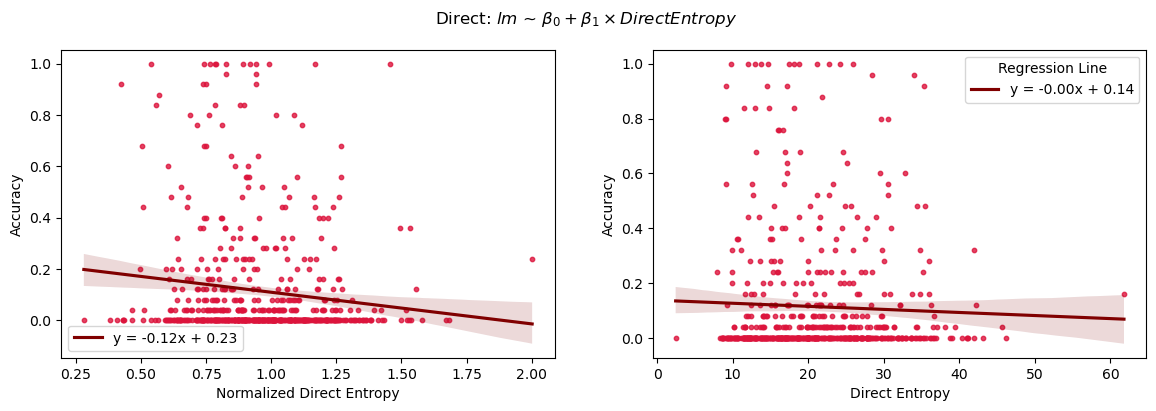

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MistralAccDirect   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9171
Date:                Mon, 13 May 2024   Prob (F-statistic):              0.339
Time:                        18:21:06   Log-Likelihood:                 38.274
No. Observations:                 617   AIC:                            -72.55
Df Residuals:                     615   BIC:                            -63.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1383      0.026      5.276      0.000       0.087       0.190
Direct Entropy    -0.0011      0.001     -0.958      0.339      -0.003       0.001
==============================================================================
Omnibus:                      320.640   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1428.108
Skew:                           2.475   Prob(JB):                    7.77e-311
Kurtosis:                       8.572   Cond. No.                         64.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
x1 = pd.to_numeric(cot_merged['Normalized Direct Entropy'])
x2 = pd.to_numeric(cot_merged['Direct Entropy'])
y = pd.to_numeric(cot_merged['MistralAccDirect'])

# Create a DataFrame for Seaborn
cot_lm_normalized = pd.DataFrame({
    'Normalized Entropy': x1,
    'Accuracy Delta': y
})
cot_lm_unnormalized = pd.DataFrame({
    'Entropy': x2,
    'Accuracy Delta': y

})



fig, axs = plt.subplots(1, 2, figsize=(14, 4))
X = sm.add_constant(x1)
lm = sm.OLS(y, X).fit()
intercept, slope = lm.params
sns.regplot(ax=axs[0], x='Normalized Entropy', y='Accuracy Delta', data=cot_lm_normalized, ci=95,
                 scatter_kws={"color": "crimson", "s": 10},  # scatter_kws for scatter points
                 line_kws={"color": "maroon", "label": f'y = {slope:.2f}x + {intercept:.2f}'})  # line_kws for line
axs[0].legend()
axs[0].set_xlabel('Normalized Direct Entropy')
axs[0].set_ylabel(r'Accuracy')


X = sm.add_constant(x2)
lm = sm.OLS(y, X).fit()
intercept, slope = lm.params
sns.regplot(ax=axs[1], x='Entropy', y='Accuracy Delta', data=cot_lm_unnormalized, ci=95,
                 scatter_kws={"color": "crimson", "s": 10},  # scatter_kws for scatter points
                 line_kws={"color": "maroon", "label": f'y = {slope:.2f}x + {intercept:.2f}'})  # line_kws for line

axs[1].legend()
axs[1].set_xlabel('Direct Entropy')
axs[1].set_ylabel(r'Accuracy')

fig.suptitle(r'Direct: $lm$ ~ $\beta_0 + \beta_1 \times DirectEntropy$')
plt.legend(title='Regression Line')

plt.show()
lm.summary()